# Spectral Fly Fishing
## Thomas Cycyota

### Notebook 1: KMeans Clustering
Using Scikit Learn KMeans model on both Greyscale and Color RGB fly images

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
%matplotlib inline

In [49]:
folder_prefix = "final_data/"

## Step 1: Load and prepare data

In [51]:
images = np.loadtxt(folder_prefix+"images_grey_final.txt", dtype='uint8', delimiter=',')

In [50]:
images_rgb = np.loadtxt(folder_prefix+"images_rgb_final.txt", dtype='uint8', delimiter=',')

In [52]:
print("Greyscale shape:", images.shape)
print("RGB shape:", images_rgb.shape)

Greyscale shape: (459, 4096)
RGB shape: (459, 12288)


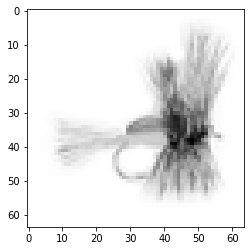

In [62]:
image_grey = images[117,:]
plot_grey = np.reshape(image_grey, (64,64)).astype('uint8')
plt.imshow(plot_grey,cmap='gray');

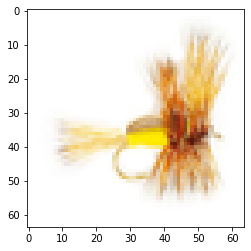

In [61]:
image_rgb = images_rgb[117,:]
plot_rgb = np.reshape(image_rgb, (64,64,3)).astype('uint8')
plt.imshow(plot_rgb);

## Step 2: Greyscale images, PCA and KMeans
We will implement KMeans using `k=3`, as there are 3 commonly accepted fly families: 

* **Dry Fly**: The Dry Fly is designed to float on top of the water, and simulate an insect landing on the water or floating on top of the water.
* **Nymphs**: A Nymph fly simulates an insects nymph lifecycle stage, where the insect spends the majority of it’s time underwater. 
* **Streamers**: Streamer fly fishing flies are intended to mimic larger water animals such as: minnows,  leaches and other larger waterline.

Source: https://blueridgemountainlife.com/types-of-fly-fishing-flies/#:~:text=Fly%20Fishing%20Flies%20%E2%80%93%20The%203,the%20location%20you%20are%20fishing.

In [63]:
#PCA with first and second principal components
pca_grey = PCA(n_components=2).fit_transform(images)

#Fit Kmeans
fly_fams = 3
kmeans = KMeans(init="random", n_clusters=fly_fams)
kmeans.fit(pca_grey)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

### Plotting Greyscale KMeans

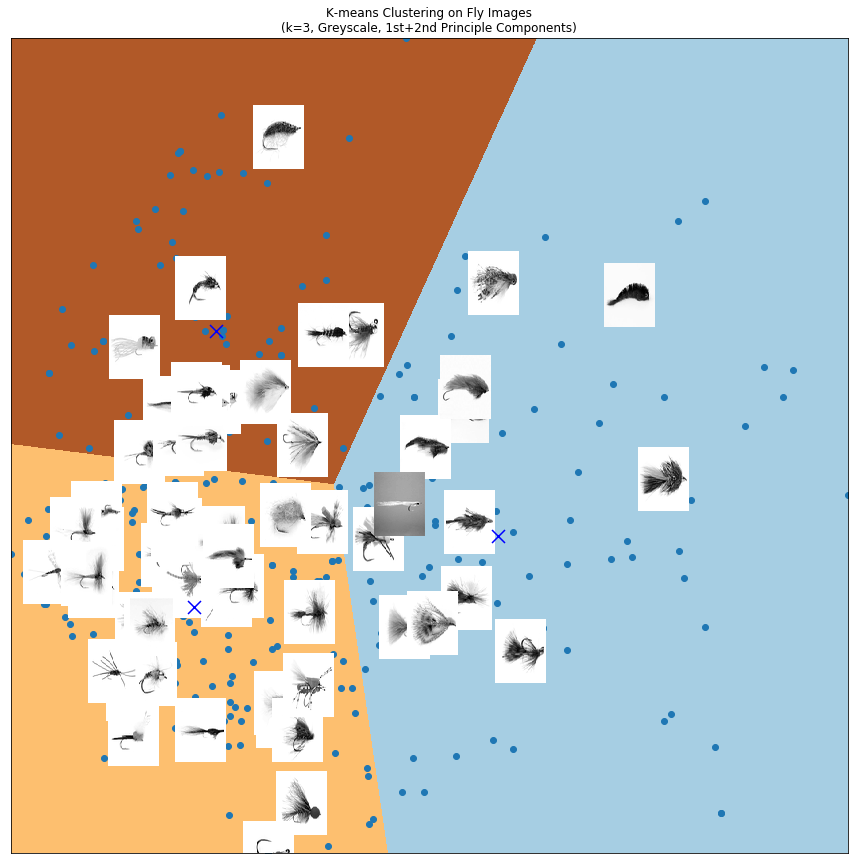

In [64]:
h = 1
x_min, x_max = pca_grey[:, 0].min() - 1, pca_grey[:, 0].max() + 1
y_min, y_max = pca_grey[:, 1].min() - 1, pca_grey[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(111)

#plotting variables
sz = 300
m = images.shape[0]
num_to_show = 60
for i in range(num_to_show):
    img_num = np.random.randint(0, m)
    x_l = pca_grey[img_num, 0] - (sz / 2.)
    x_r = pca_grey[img_num, 0] + (sz / 2.)
    y_b = pca_grey[img_num, 1] - (sz / 2.)
    y_t = pca_grey[img_num, 1] + (sz / 2.)
    image= np.reshape(images[img_num,:], (64,64)).astype('uint8')
    ax.imshow(image, cmap='gray',zorder=50, extent=(x_l, x_r, y_b, y_t))

plt.scatter(pca_grey[:,0],pca_grey[:,1])
ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')    

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=100)
plt.title('K-means Clustering on Fly Images\n''(k=3, Greyscale, 1st+2nd Principle Components)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show();

## Step 3: RGB images, PCA and KMeans


In [65]:
#PCA with first and second principal components
pca_rgb = PCA(n_components=2).fit_transform(images_rgb)

#Fit Kmeans
fly_fams = 3
kmeans_rgb = KMeans(init="random", n_clusters=fly_fams)
kmeans_rgb.fit(pca_rgb)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

### Plotting RGB Kmeans

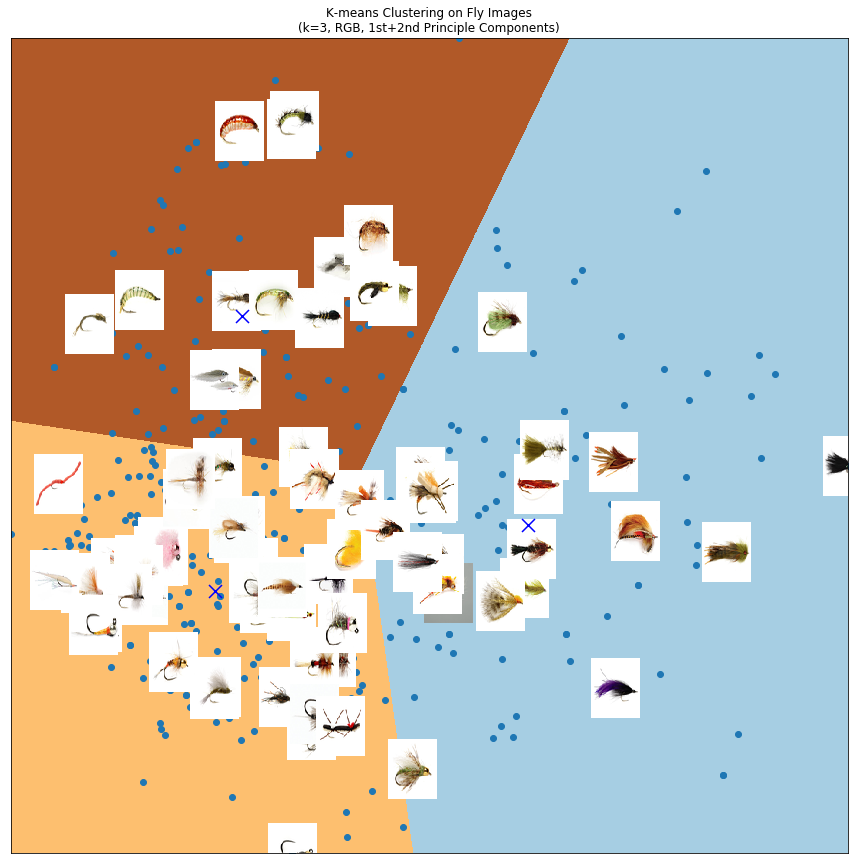

In [67]:
h = 1
x_min, x_max = pca_rgb[:, 0].min() - 1, pca_rgb[:, 0].max() + 1
y_min, y_max = pca_rgb[:, 1].min() - 1, pca_rgb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans_rgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(111)

#plotting variables
sz = 500
m = images_rgb.shape[0]
num_to_show = 80
for i in range(num_to_show):
    img_num = np.random.randint(0, m)
    x_l = pca_rgb[img_num, 0] - (sz / 2.)
    x_r = pca_rgb[img_num, 0] + (sz / 2.)
    y_b = pca_rgb[img_num, 1] - (sz / 2.)
    y_t = pca_rgb[img_num, 1] + (sz / 2.)
    image = np.reshape(images_rgb[img_num,:], (64,64,3)).astype('uint8')
    ax.imshow(image,zorder=50, extent=(x_l, x_r, y_b, y_t))

plt.scatter(pca_rgb[:,0],pca_rgb[:,1])
ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')    

centroids = kmeans_rgb.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=100)
plt.title('K-means Clustering on Fly Images\n''(k=3, RGB, 1st+2nd Principle Components)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show();

## Step 4: Plot Images for Clusters to compare

In [177]:
fly_list = open(folder_prefix+"fly_ids_final.txt", "r").read()
fly_ids = [x.strip() for x in fly_list.replace("'", "").split("[")[1].split(',')]

In [134]:
labels = kmeans_rgb.labels_
fam0 = np.where(labels == 0)[0].tolist()
fam1 = np.where(labels == 1)[0].tolist()
fam2 = np.where(labels == 2)[0].tolist()

In [182]:
print("Fam0 length:", len(fam0))
print("Fam1 length:", len(fam1))
print("Fam2 length:", len(fam2))

Fam0 length: 112
Fam1 length: 244
Fam2 length: 103


In [174]:
def plot_family(fam):
    fam = fam
    fig=plt.figure(figsize=(15,15))
    col = 6
    rows = 6
    selected = random.sample(fam, 37)
    for i in range(1, col*rows+1):
        img_num = selected[i]
        image = np.reshape(images_rgb[img_num,:], (64,64,3)).astype('uint8')
        fig.add_subplot(rows, col, i)
        plt.imshow(image)
        plt.title(fly_ids[img_num])
        plt.axis('off')
    plt.show();

#### Plot images in Fly Family 0

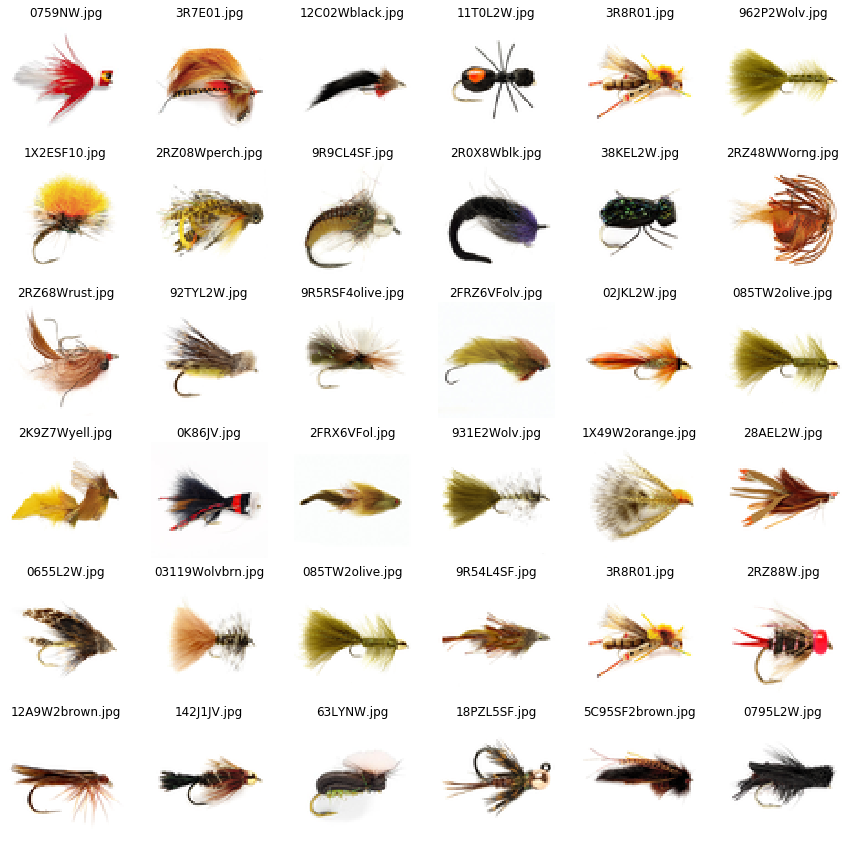

In [180]:
plot_family(fam0)

#### Plot images in Fly Family 1

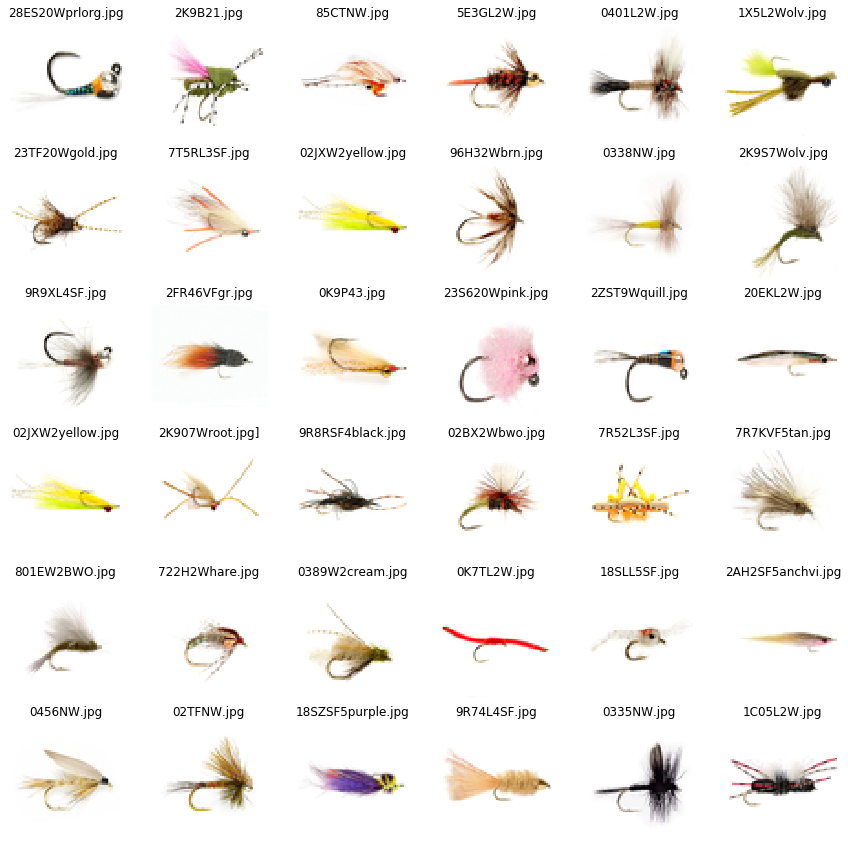

In [178]:
plot_family(fam1)

#### Plot images in Fly Family 2

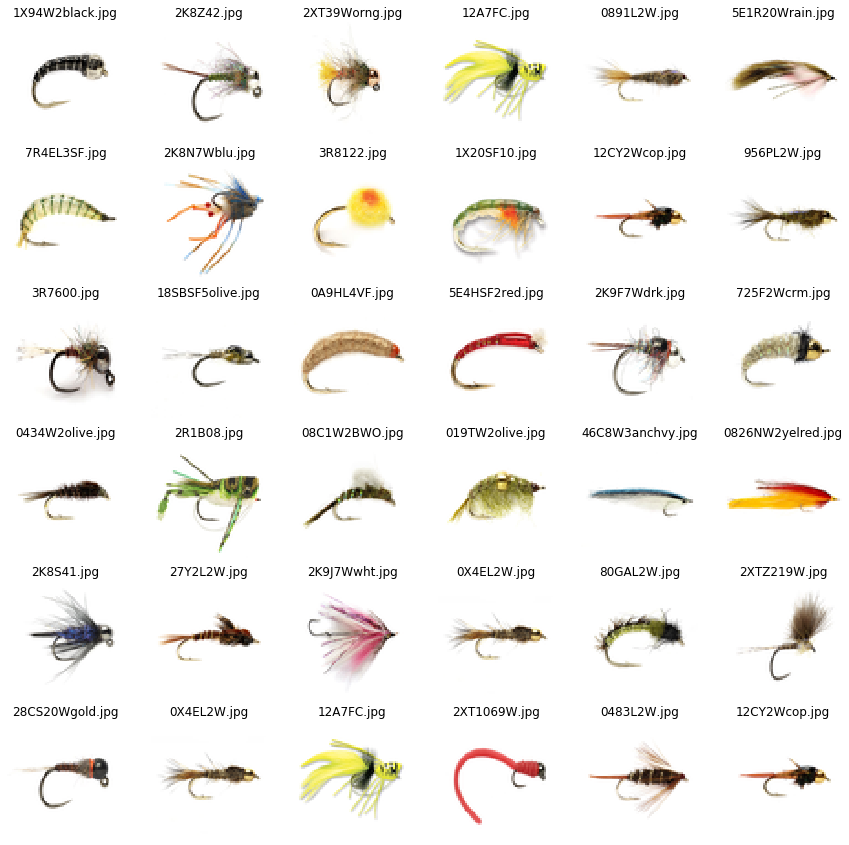

In [179]:
plot_family(fam2)